<a href="https://colab.research.google.com/github/HugoViniciusSF/AVD2/blob/main/Hugo_dados_3_unidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [ ]:
# utilizar os Dataframes do Pandas para manipular as instâncias
import pandas as pd
# matplotlib para visualizar
import matplotlib.pyplot as plt
# gdown para baixar os dados
import gdown
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/Video_Games.csv')
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gData = df.loc[: , ['Platform' , 'Genre' , 'Publisher' , 'Rating', 'Global_Sales']]
gData.head(10000)

,Platform,Genre,Publisher,Rating,Global_Sales
0,Wii,Sports,Nintendo,E,82.53
1,NES,Platform,Nintendo,NaN,40.24
2,Wii,Racing,Nintendo,E,35.52
3,Wii,Sports,Nintendo,E,32.77
4,GB,Role-Playing,Nintendo,NaN,31.37
...,...,...,...,...,...
9995,GBA,Racing,THQ,E,0.11
9996,PS3,Action,Sega,NaN,0.11
9997,PS3,Misc,Konami Digital Entertainment,E10+,0.11
9998,PS3,Action,Tecmo Koei,M,0.11


In [ ]:
gData.info()
gData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16928 non-null  object 
 1   Genre         16926 non-null  object 
 2   Publisher     16873 non-null  object 
 3   Rating        10092 non-null  object 
 4   Global_Sales  16928 non-null  float64
dtypes: float64(1), object(4)
memory usage: 661.4+ KB


,Global_Sales
count,16928.000000
mean,0.539520
std,1.550545
min,0.010000
25%,0.060000
50%,0.170000
75%,0.490000
max,82.530000


In [ ]:
len(gData['Platform'].unique())

31

In [ ]:
len(gData['Genre'].unique())

13

In [ ]:
len(gData['Publisher'].unique())

582

In [ ]:
# Excluir os valores NaN da coluna 'Genre'
gData_sem_nan = gData.dropna(subset=['Genre'])

# Listar os gêneros únicos após remover os NaN
generos_sem_nan = gData_sem_nan['Genre'].unique()
print(generos_sem_nan)

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [ ]:
# Excluir os valores NaN da coluna 'Platform'
gData_sem_nan = gData.dropna(subset=['Platform'])

# Listar os gêneros únicos após remover os NaN
plataforma_sem_nan = gData_sem_nan['Platform'].unique()
print(plataforma_sem_nan)


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [ ]:
# Exclua os valores NaN das colunas 'Genre' e 'Platform'
gData_sem_nan = gData.dropna(subset=['Genre', 'Platform'])

# Agrupe os dados por gênero
grupos_por_genero = gData_sem_nan.groupby('Genre')

# Itere sobre os grupos e imprima as plataformas associadas a cada gênero
for genero, grupo in grupos_por_genero:
    print(f"Gênero: {genero}")
    print(f"Plataformas: {grupo['Platform'].unique()}")
    print()

Gênero: Action
Plataformas: ['PS3' 'PS2' 'X360' 'PS4' 'DS' 'PSP' 'N64' 'Wii' 'NES' 'PS' 'XOne' 'SNES'
 'GC' '3DS' 'GB' 'XB' 'GBA' 'GEN' 'PC' '2600' 'WiiU' 'PSV' 'DC' 'SAT']

Gênero: Adventure
Plataformas: ['GB' 'X360' 'PS3' 'NES' 'PS' 'DS' 'PC' 'GBA' 'PS2' 'GC' 'PS4' 'XOne'
 'Wii' '2600' 'DC' 'PSP' '3DS' 'SNES' 'XB' 'PSV' 'SAT' 'N64' 'TG16' 'GEN'
 'WiiU' '3DO']

Gênero: Fighting
Plataformas: ['Wii' '3DS' 'PS' 'GC' 'SNES' 'N64' 'WiiU' 'PS3' 'PS2' 'NES' 'X360' 'PS4'
 'GEN' 'PSP' 'SAT' 'XB' 'XOne' 'GBA' '2600' 'DS' 'PSV' 'DC' 'NG' 'PC']

Gênero: Misc
Plataformas: ['Wii' 'X360' 'DS' 'GB' 'PS3' 'PS2' 'WiiU' 'PS4' 'GBA' 'PS' 'PC' 'XOne'
 'SNES' 'N64' 'GC' 'NES' 'PSV' '3DS' 'XB' '2600' 'PSP' 'SAT' 'SCD' 'GEN']

Gênero: Platform
Plataformas: ['NES' 'DS' 'Wii' 'SNES' 'GB' 'N64' '3DS' 'PS' 'GC' 'GEN' 'PS3' 'GBA'
 'PS2' 'WiiU' '2600' 'PSP' 'DC' 'PS4' 'SCD' 'X360' 'PSV' 'XB' 'SAT' 'XOne'
 'PC' 'GG']

Gênero: Puzzle
Plataformas: ['GB' 'DS' '2600' 'NES' 'GBA' 'Wii' 'PS' 'PS2' '3DS' 'SNES' 'GC' 'WiiU

In [ ]:
# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Verificando os resultados
print(gData_clean['Rating'].unique())


NameError: name 'gData_clean' is not defined

In [ ]:
gData = df.loc[: , ['Platform' , 'Genre' , 'Publisher' , 'Rating', 'Global_Sales']]
# Removendo as linhas que possuem valores nulos em qualquer uma das colunas selecionadas
gData_clean = gData.dropna()

# Verificando as primeiras linhas do DataFrame limpo
print(gData_clean.head())
# Verificando o número total de linhas após a limpeza
num_linhas = gData_clean.shape[0]
print(f"Total de linhas com todos os valores não nulos: {num_linhas}")

  Platform     Genre Publisher Rating  Global_Sales
0      Wii    Sports  Nintendo      E         82.53
2      Wii    Racing  Nintendo      E         35.52
3      Wii    Sports  Nintendo      E         32.77
6       DS  Platform  Nintendo      E         29.80
7      Wii      Misc  Nintendo      E         28.92
Total de linhas com todos os valores não nulos: 10085


In [ ]:
print(gData_grouped.head())


NameError: name 'gData_grouped' is not defined

In [ ]:
# Filtrando os dados brutos para 'Sports' com rating 'E'
sports_data = gData_clean[(gData_clean['Genre'] == 'Sports') & (gData_clean['Rating'] == 'E')]

# Mostrando as primeiras linhas desses dados
print(sports_data.head())

# Calculando o total de Global_Sales para verificar o valor
total_sales = sports_data['Global_Sales'].sum()
print(f"Total de vendas globais para Sports com rating E: {total_sales}")


   Platform   Genre        Publisher Rating  Global_Sales
0       Wii  Sports         Nintendo      E         82.53
3       Wii  Sports         Nintendo      E         32.77
13      Wii  Sports         Nintendo      E         22.70
15      Wii  Sports         Nintendo      E         21.79
77      PS4  Sports  Electronic Arts      E          8.57
Total de vendas globais para Sports com rating E: 856.3500000000001


In [ ]:
# Filtrando os dados brutos para com rating 'E'
sports_data = gData_clean[(gData_clean['Genre'] == 'Action') & (gData_clean['Rating'] == 'M')]

# Mostrando as primeiras linhas desses dados
print(sports_data.head())

# Calculando o total de Global_Sales para verificar o valor
total_sales = sports_data['Global_Sales'].sum()
print(f"Total de vendas globais para Sports com rating E: {total_sales}")


   Platform   Genre             Publisher Rating  Global_Sales
16      PS3  Action  Take-Two Interactive      M         21.04
17      PS2  Action  Take-Two Interactive      M         20.81
23     X360  Action  Take-Two Interactive      M         16.27
24      PS2  Action  Take-Two Interactive      M         16.15
38      PS2  Action  Take-Two Interactive      M         13.10
Total de vendas globais para Sports com rating E: 604.33


In [ ]:
# Filtrando os dados brutos para com rating 'E'
sports_data = gData_clean[(gData_clean['Genre'] == 'Shooter') & (gData_clean['Rating'] == 'M')]

# Mostrando as primeiras linhas desses dados
print(sports_data.head())

# Calculando o total de Global_Sales para verificar o valor
total_sales = sports_data['Global_Sales'].sum()
print(f"Total de vendas globais para Sports com rating E: {total_sales}")


   Platform    Genre   Publisher Rating  Global_Sales
29     X360  Shooter  Activision      M         14.73
32     X360  Shooter  Activision      M         14.61
34      PS3  Shooter  Activision      M         13.79
35     X360  Shooter  Activision      M         13.67
36     X360  Shooter  Activision      M         13.47
Total de vendas globais para Sports com rating E: 647.2600000000001


In [ ]:
# Agrupando os dados por Genre e Rating, e calculando o total de Global_Sales
gData_grouped_genre_rating = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Verificando o resultado da agregação
print(gData_grouped_genre_rating)


NameError: name 'gData_filtered' is not defined

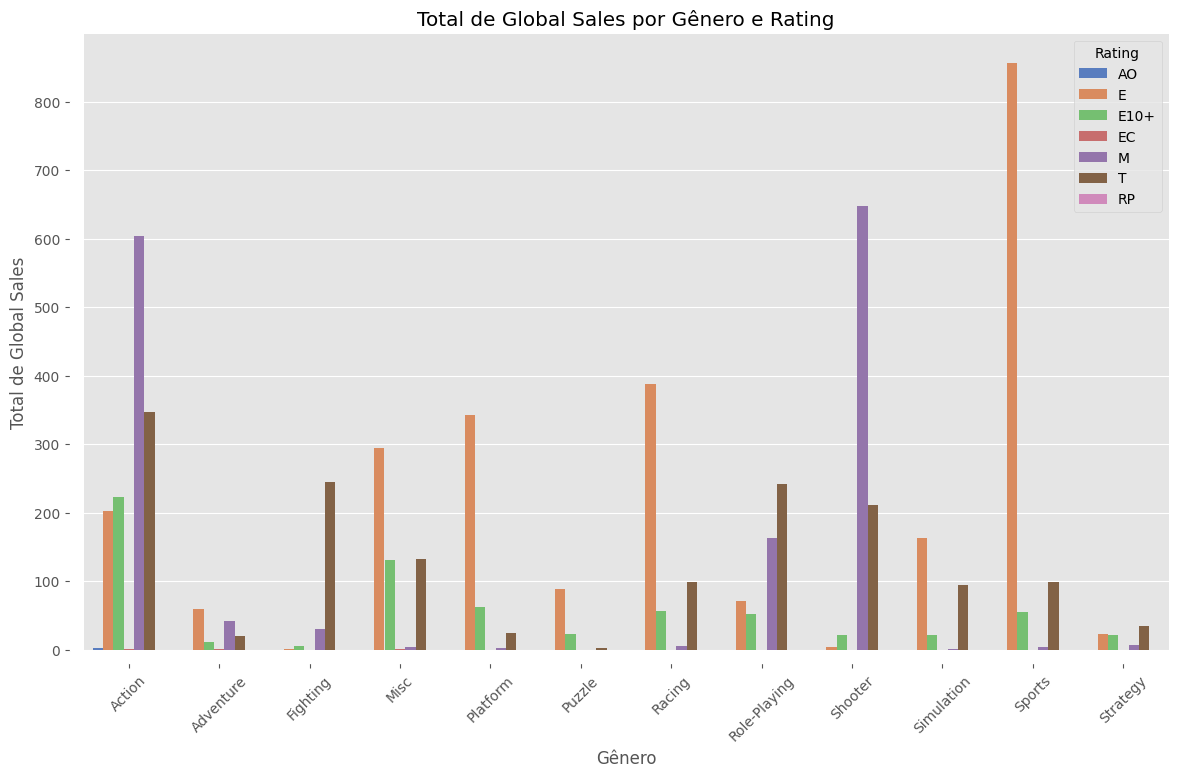

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre e Rating, e calculando o total de Global_Sales
gData_grouped_genre_rating = gData_filtered.groupby(['Genre', 'Rating']).agg({'Global_Sales': 'sum'}).reset_index()

# Criando o gráfico
plt.figure(figsize=(14, 8))
sns.barplot(
    data=gData_grouped_genre_rating,
    x='Genre',
    y='Global_Sales',
    hue='Rating',
    errorbar=None,
    palette='muted'
)

# Ajustando o gráfico
sns.despine(offset=10, trim=True)
plt.title('Total de Global Sales por Gênero e Rating')
plt.xlabel('Gênero')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Rating')

# Exibindo o gráfico
plt.show()


In [ ]:
import pandas as pd

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Filtrando para o gênero "Action", plataforma "PS4", e rating "E"
specific_data = gData_filtered[
    (gData_filtered['Genre'] == 'Sports') &
    (gData_filtered['Platform'] == 'PS2') &
    (gData_filtered['Rating'] == 'E')
]

# Exibindo os valores de Global_Sales
print(specific_data[['Global_Sales']])

total_global_sales = specific_data['Global_Sales'].sum()
print(f'Total de Global Sales para gênero "Action", plataforma "PS4" e rating "E": {total_global_sales}')


       Global_Sales
183            5.23
213            4.91
238            4.53
241            4.49
250            4.39
...             ...
15073          0.02
15513          0.02
15776          0.02
16799          0.63
16840          0.62

[243 rows x 1 columns]
Total de Global Sales para gênero "Action", plataforma "PS4" e rating "E": 202.07999999999996


# TESTES

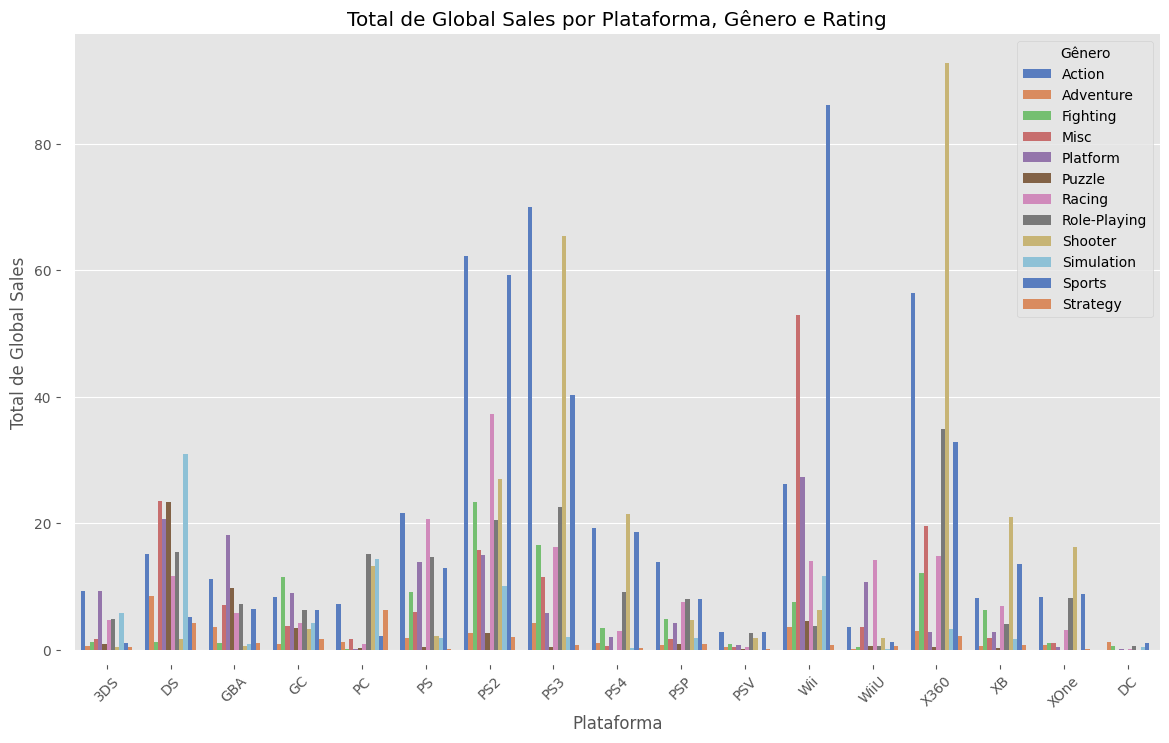

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Platform, e Rating, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Platform', 'Rating']).agg({'Global_Sales': 'sum'}).reset_index()

# Criando o gráfico
plt.figure(figsize=(14, 8))
sns.barplot(
    data=gData_grouped,
    x='Platform',
    y='Global_Sales',
    hue='Genre',
    palette='muted',
    errorbar=None
)

# Ajustando o gráfico
sns.despine(offset=10, trim=True)
plt.title('Total de Global Sales por Plataforma, Gênero e Rating')
plt.xlabel('Plataforma')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Gênero')

# Exibindo o gráfico
plt.show()


In [ ]:
# Verifique todos os gêneros únicos no seu DataFrame
unique_genres = gData_grouped['Genre'].unique()
print(unique_genres)


['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


Gêneros únicos presentes nos dados: ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


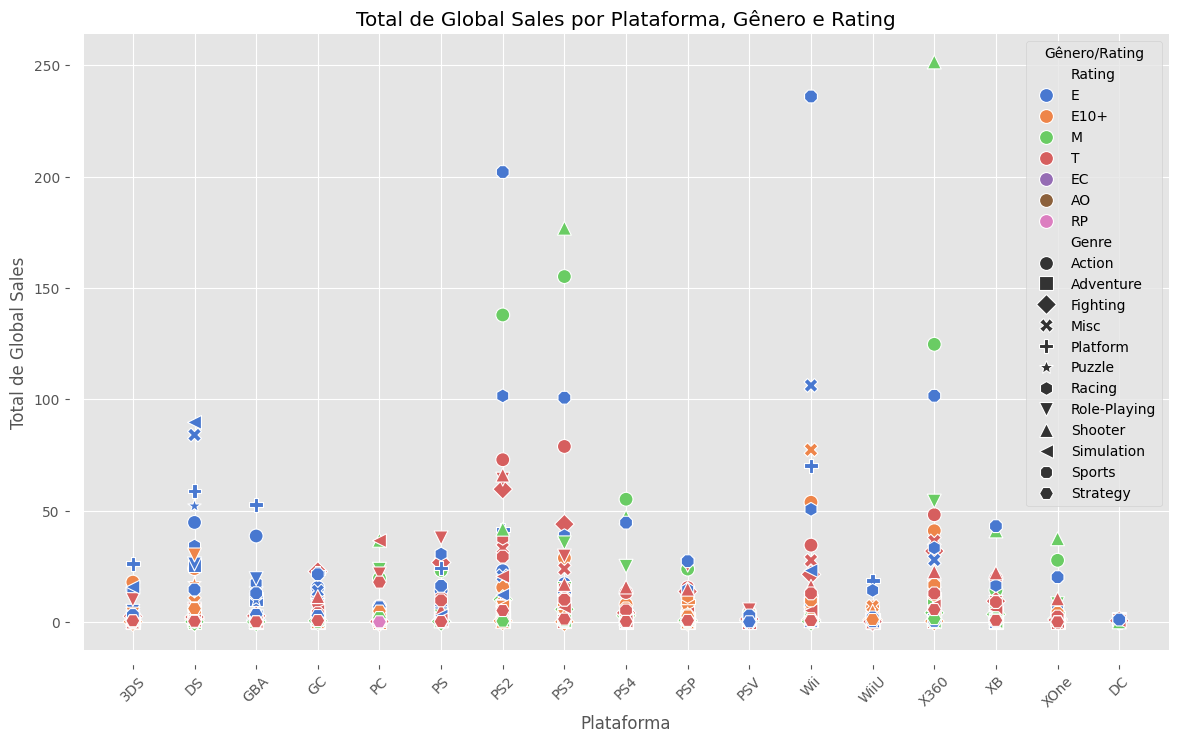

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Platform, e Rating, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Platform', 'Rating']).agg({'Global_Sales': 'sum'}).reset_index()

# Verificando os gêneros únicos presentes nos dados
unique_genres = gData_grouped['Genre'].unique()
print(f"Gêneros únicos presentes nos dados: {unique_genres}")

# Mapeamento de estilos de marcadores para cada gênero
# Certifique-se de incluir todos os gêneros únicos encontrados
markers = {
    'Action': 'o', 'Adventure': 's', 'Fighting': 'D', 'Misc': 'X', 'Platform': 'P',
    'Puzzle': '*', 'Racing': 'h', 'Role-Playing': 'v', 'Shooter': '^', 'Simulation': '<',
    'Sports': '8', 'Strategy': 'H'  # Adicionando mais gêneros, se necessário
}

# Criando o gráfico
plt.figure(figsize=(14, 8))

# Plotando os dados
sns.scatterplot(
    data=gData_grouped,
    x='Platform',
    y='Global_Sales',
    hue='Rating',  # Cores para diferentes ratings
    style='Genre',  # Formas para diferentes gêneros
    palette='muted',  # Cores para os ratings
    markers=markers,  # Estilos de marcadores para os gêneros
    s=100  # Tamanho dos pontos
)

# Ajustando o gráfico
sns.despine(offset=10, trim=True)
plt.title('Total de Global Sales por Plataforma, Gênero e Rating')
plt.xlabel('Plataforma')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Gênero/Rating')

# Exibindo o gráfico
plt.show()


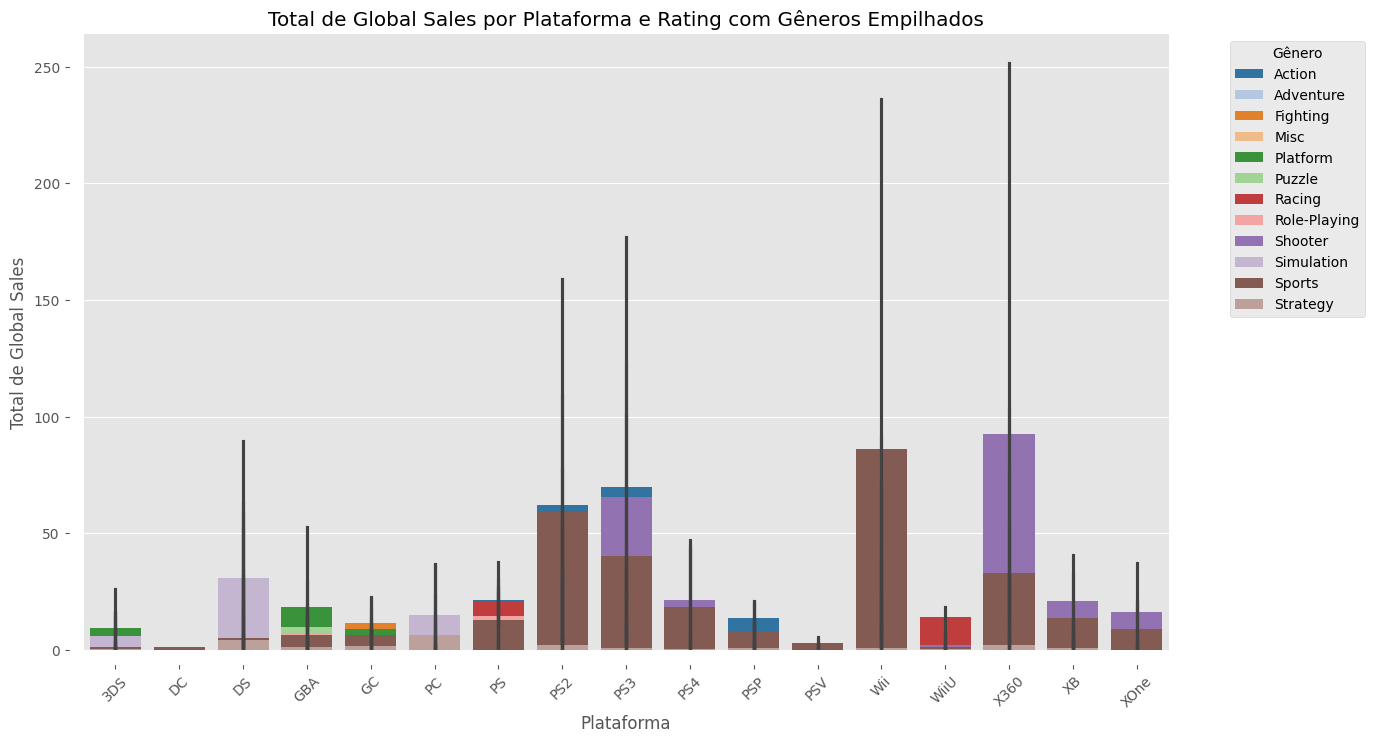

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Platform, Rating, e Genre, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Platform', 'Rating', 'Genre']).agg({'Global_Sales': 'sum'}).reset_index()

# Criando o gráfico
plt.figure(figsize=(14, 8))
g = sns.barplot(
    data=gData_grouped,
    x='Platform',
    y='Global_Sales',
    hue='Genre',
    hue_order=sorted(gData_grouped['Genre'].unique()),  # Ordernar gêneros
    palette='tab20',  # Usar uma paleta de cores com muitas opções
    dodge=False  # Barra empilhada
)

# Ajustando o gráfico
sns.despine(offset=10, trim=True)
plt.title('Total de Global Sales por Plataforma e Rating com Gêneros Empilhados')
plt.xlabel('Plataforma')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.show()


<Figure size 1400x800 with 0 Axes>

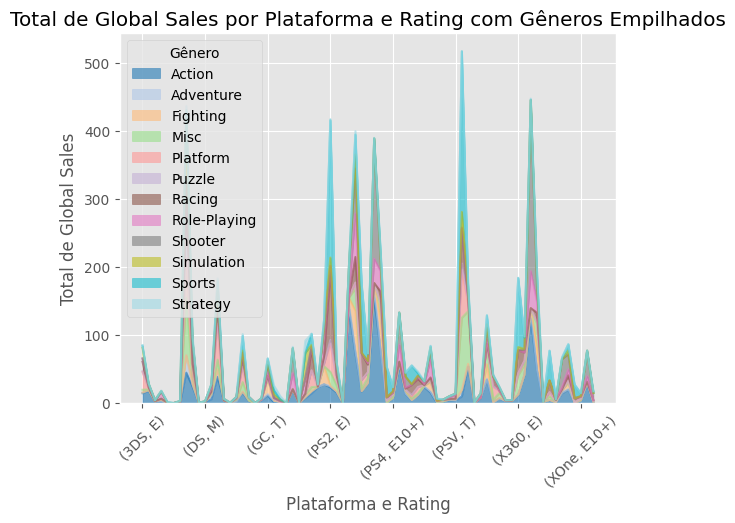

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Platform, Rating, e Genre, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Platform', 'Rating', 'Genre']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para facilitar o plot
pivot_data = gData_grouped.pivot_table(index=['Platform', 'Rating'], columns='Genre', values='Global_Sales', fill_value=0)

# Criando o gráfico
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='area', stacked=True, colormap='tab20', alpha=0.6)

# Ajustando o gráfico
plt.title('Total de Global Sales por Plataforma e Rating com Gêneros Empilhados')
plt.xlabel('Plataforma e Rating')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Gênero')

# Exibindo o gráfico
plt.show()


<Figure size 1400x800 with 0 Axes>

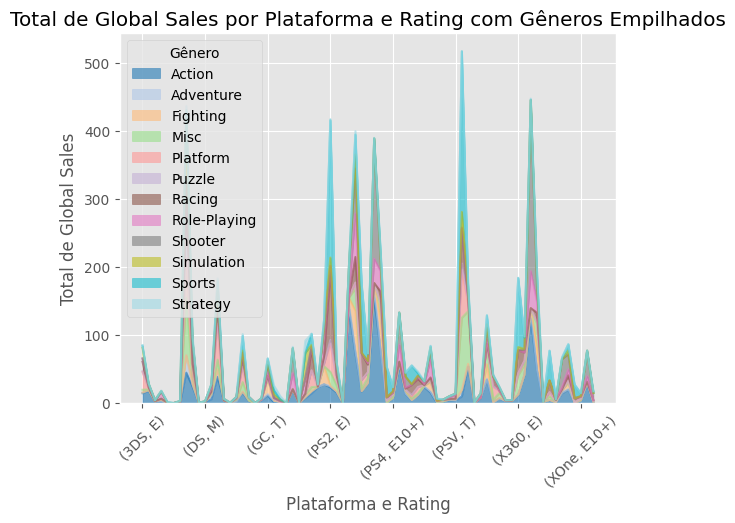

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Platform, Rating, e Genre, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Platform', 'Rating', 'Genre']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para facilitar o plot
pivot_data = gData_grouped.pivot_table(index=['Platform', 'Rating'], columns='Genre', values='Global_Sales', fill_value=0)

# Criando o gráfico
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='area', stacked=True, colormap='tab20', alpha=0.6)

# Ajustando o gráfico
plt.title('Total de Global Sales por Plataforma e Rating com Gêneros Empilhados')
plt.xlabel('Plataforma e Rating')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Gênero')

# Exibindo o gráfico
plt.show()


<Figure size 1600x1000 with 0 Axes>

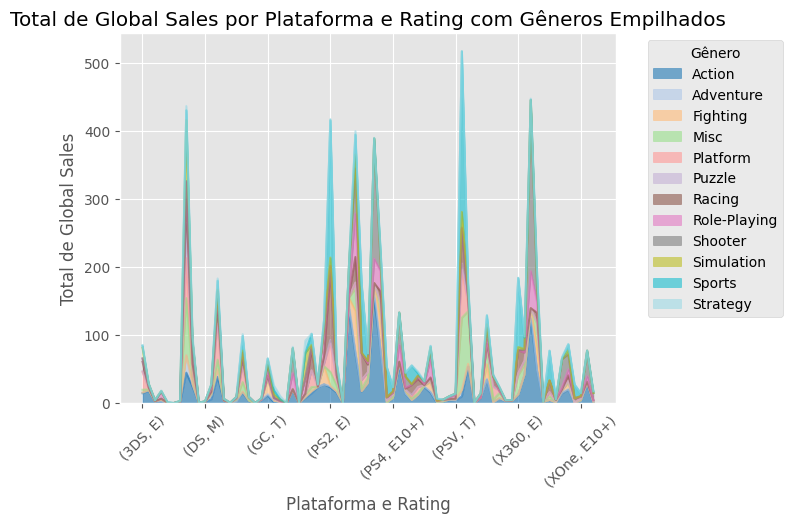

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Platform, Rating, e Genre, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Platform', 'Rating', 'Genre']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para facilitar o plot
pivot_data = gData_grouped.pivot_table(index=['Platform', 'Rating'], columns='Genre', values='Global_Sales', fill_value=0)

# Criando o gráfico
plt.figure(figsize=(16, 10))
pivot_data.plot(kind='area', stacked=True, colormap='tab20', alpha=0.6)

# Ajustando o gráfico
plt.title('Total de Global Sales por Plataforma e Rating com Gêneros Empilhados')
plt.xlabel('Plataforma e Rating')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.show()


# TESTES 2

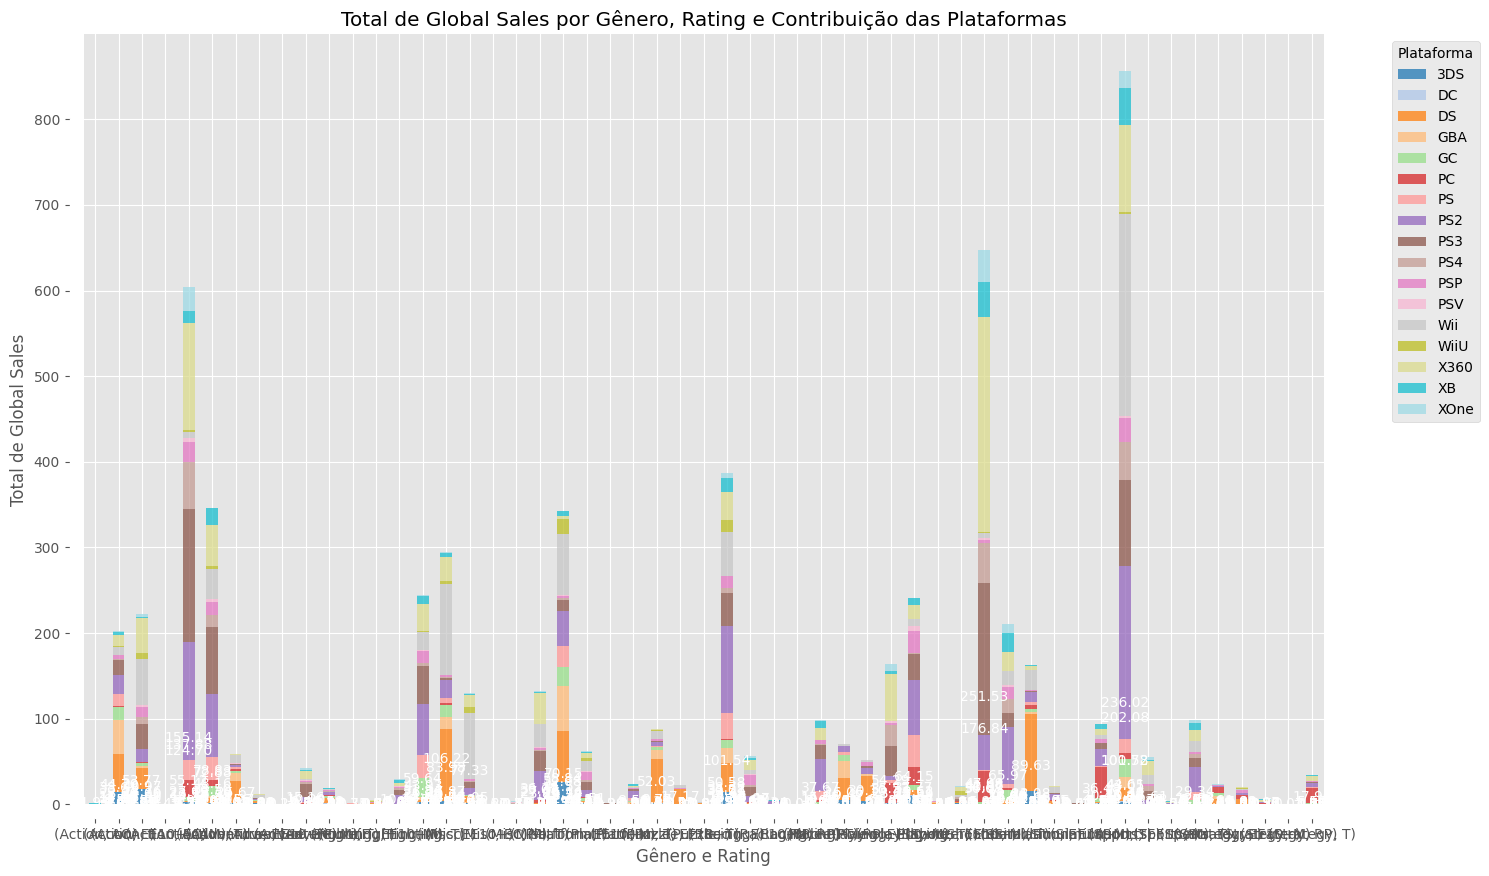

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para criar o gráfico de barras empilhadas
pivot_data = gData_grouped.pivot_table(index=['Genre', 'Rating'], columns='Platform', values='Global_Sales', fill_value=0)

# Criando o gráfico
plt.figure(figsize=(16, 10))

# Plotando as barras empilhadas
pivot_data.plot(kind='bar', stacked=True, colormap='tab20', alpha=0.75, ax=plt.gca())

# Adicionando anotações para mostrar o total de vendas por plataforma
for i, (index, row) in enumerate(pivot_data.iterrows()):
    total_sales = row.sum()
    for j, val in enumerate(row):
        if val > 0:
            plt.text(i, val / 2, f'{val:.2f}', ha='center', va='center', color='white')

# Ajustando o gráfico
plt.title('Total de Global Sales por Gênero, Rating e Contribuição das Plataformas')
plt.xlabel('Gênero e Rating')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(offset=10, trim=True)

# Exibindo o gráfico
plt.show()


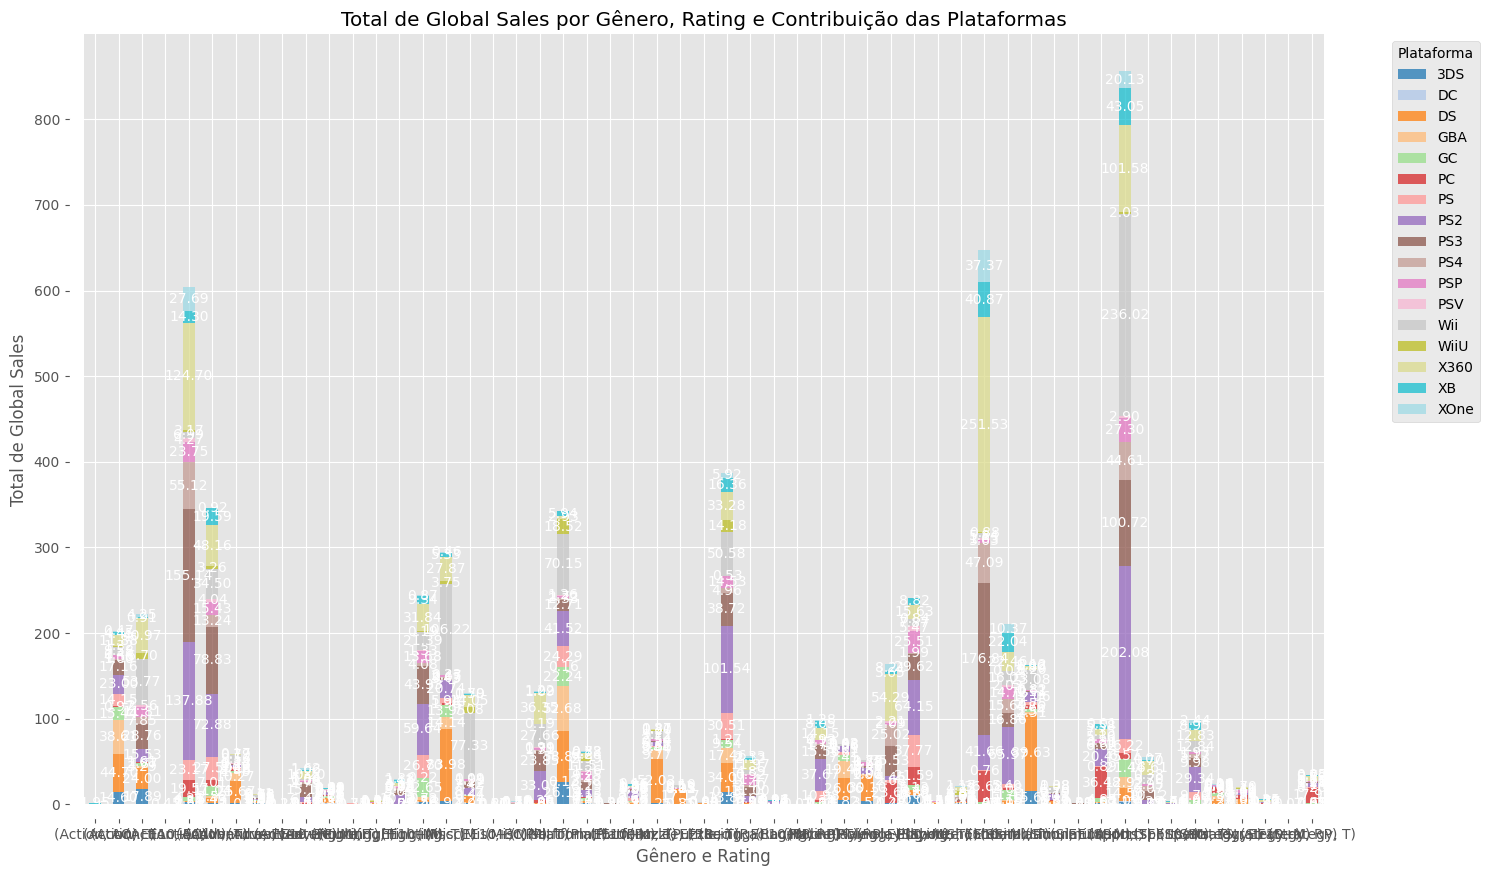

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para criar o gráfico de barras empilhadas
pivot_data = gData_grouped.pivot_table(index=['Genre', 'Rating'], columns='Platform', values='Global_Sales', fill_value=0)

# Criando o gráfico
plt.figure(figsize=(16, 10))

# Plotando as barras empilhadas
pivot_data.plot(kind='bar', stacked=True, colormap='tab20', alpha=0.75, ax=plt.gca())

# Adicionando anotações para mostrar o total de vendas por plataforma dentro de cada barra
for i, (index, row) in enumerate(pivot_data.iterrows()):
    total_sales = row.sum()
    bottom = 0
    for j, (platform, sales) in enumerate(row.items()):
        if sales > 0:
            plt.text(i, bottom + sales / 2, f'{sales:.2f}', ha='center', va='center', color='white')
            bottom += sales

# Ajustando o gráfico
plt.title('Total de Global Sales por Gênero, Rating e Contribuição das Plataformas')
plt.xlabel('Gênero e Rating')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(offset=10, trim=True)

# Exibindo o gráfico
plt.show()


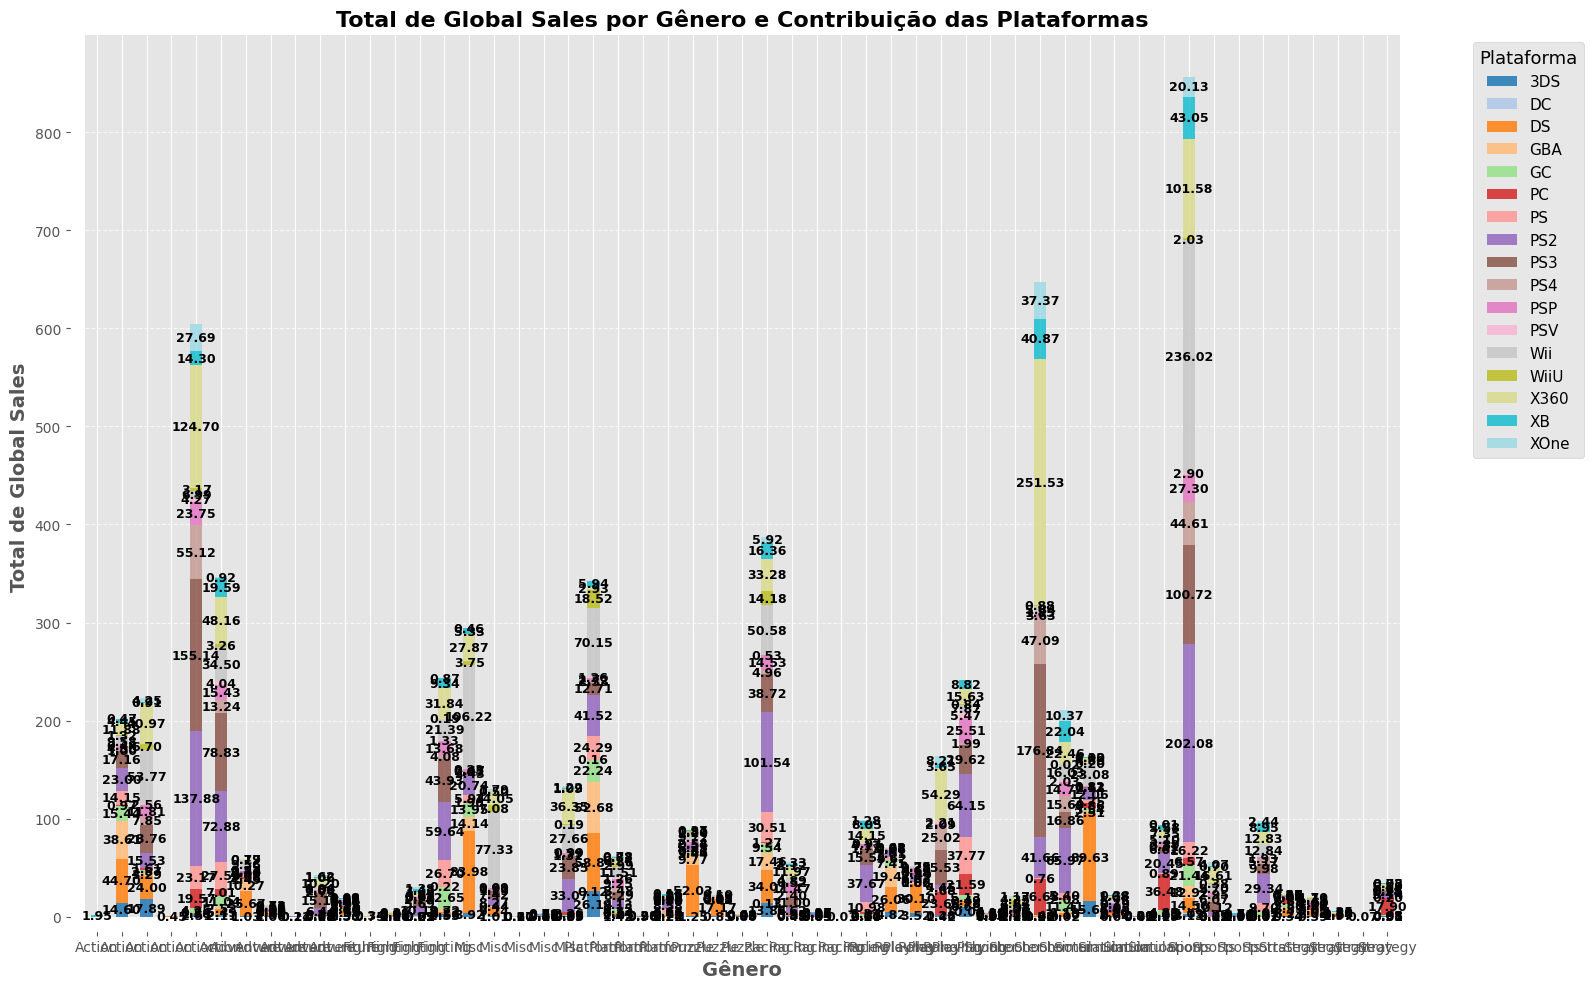

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para criar o gráfico de barras empilhadas
pivot_data = gData_grouped.pivot_table(index=['Genre', 'Rating'], columns='Platform', values='Global_Sales', fill_value=0)

# Criando um DataFrame separado para o eixo x com apenas os gêneros
x_labels = [f'{genre}' for genre in pivot_data.index.get_level_values('Genre')]

# Criando o gráfico
plt.figure(figsize=(16, 10))

# Plotando as barras empilhadas
ax = pivot_data.plot(kind='bar', stacked=True, colormap='tab20', alpha=0.85, ax=plt.gca())

# Adicionando anotações para mostrar o total de vendas por plataforma dentro de cada barra
for i, (index, row) in enumerate(pivot_data.iterrows()):
    total_sales = row.sum()
    bottom = 0
    for j, (platform, sales) in enumerate(row.items()):
        if sales > 0:
            plt.text(i, bottom + sales / 2, f'{sales:.2f}', ha='center', va='center', color='black', fontsize=9, fontweight='bold')
            bottom += sales

# Ajustando o gráfico
plt.title('Total de Global Sales por Gênero e Contribuição das Plataformas', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14, fontweight='bold')
plt.ylabel('Total de Global Sales', fontsize=14, fontweight='bold')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adicionando linhas de grade horizontais
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustando a legenda
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='13', fontsize='11', frameon=True, framealpha=0.9)

# Estilizando o gráfico
sns.despine(offset=10, trim=True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


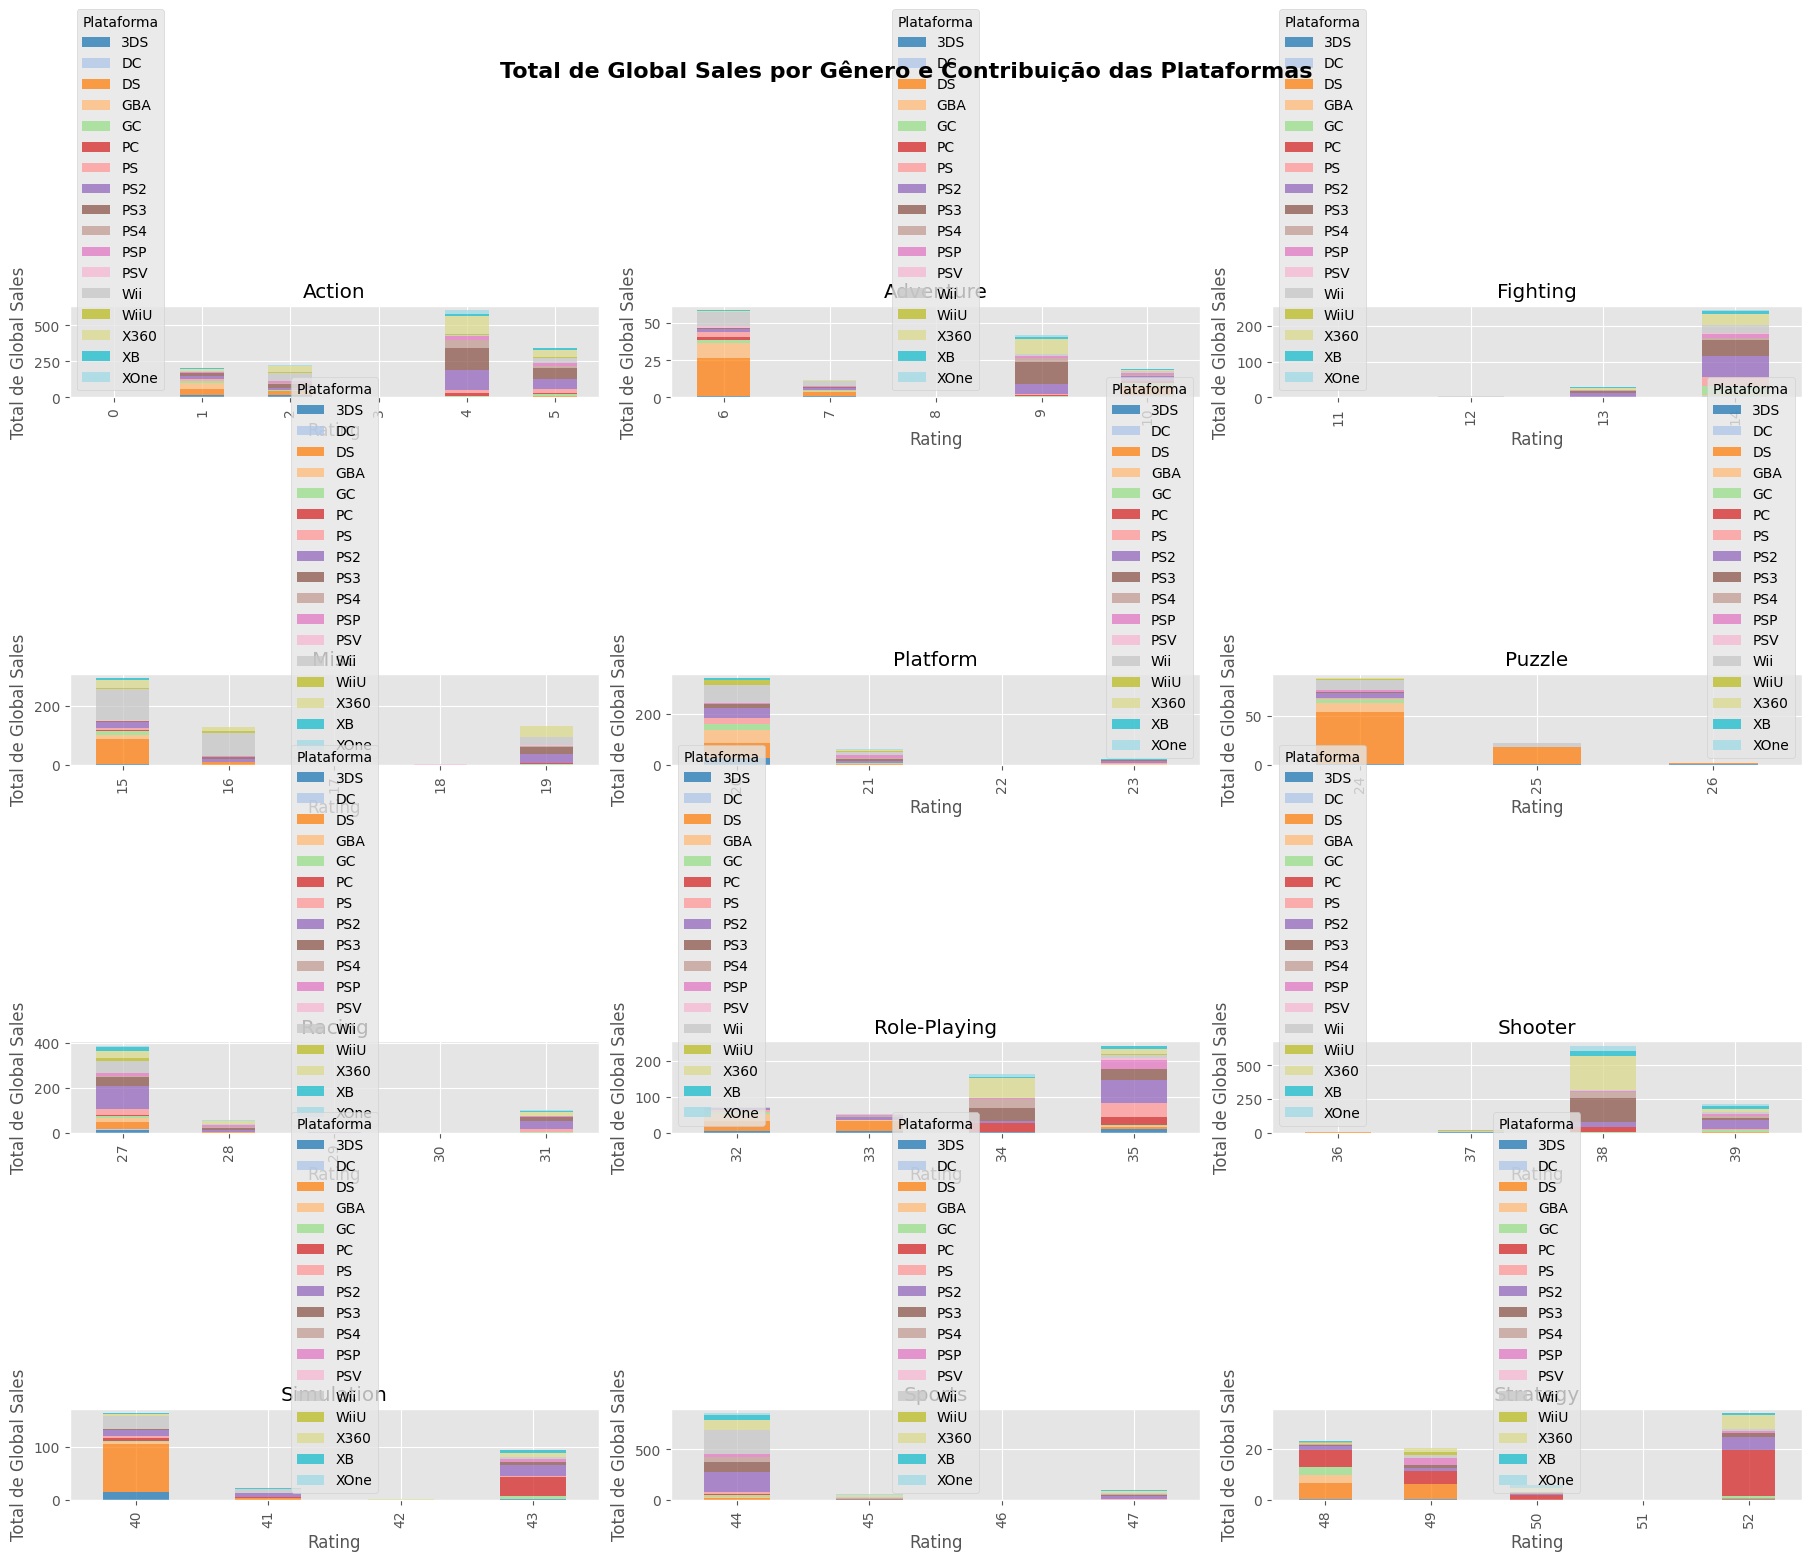

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para criar o gráfico de barras empilhadas
pivot_data = gData_grouped.pivot_table(index=['Genre', 'Rating'], columns='Platform', values='Global_Sales', fill_value=0).reset_index()

# Configurando o número de colunas para os subplots
genres = pivot_data['Genre'].unique()
n_genres = len(genres)
n_cols = 3
n_rows = (n_genres + n_cols - 1) // n_cols  # Cálculo para o número de linhas

# Criando os subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 15), constrained_layout=True)
axes = axes.flatten()

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = pivot_data[pivot_data['Genre'] == genre].drop('Genre', axis=1)
    genre_data.plot(kind='bar', stacked=True, colormap='tab20', alpha=0.75, ax=ax)
    ax.set_title(genre)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Total de Global Sales')
    ax.legend(title='Plataforma')

# Ajustando subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustando o título do gráfico
fig.suptitle('Total de Global Sales por Gênero e Contribuição das Plataformas', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()


# TESTE 3

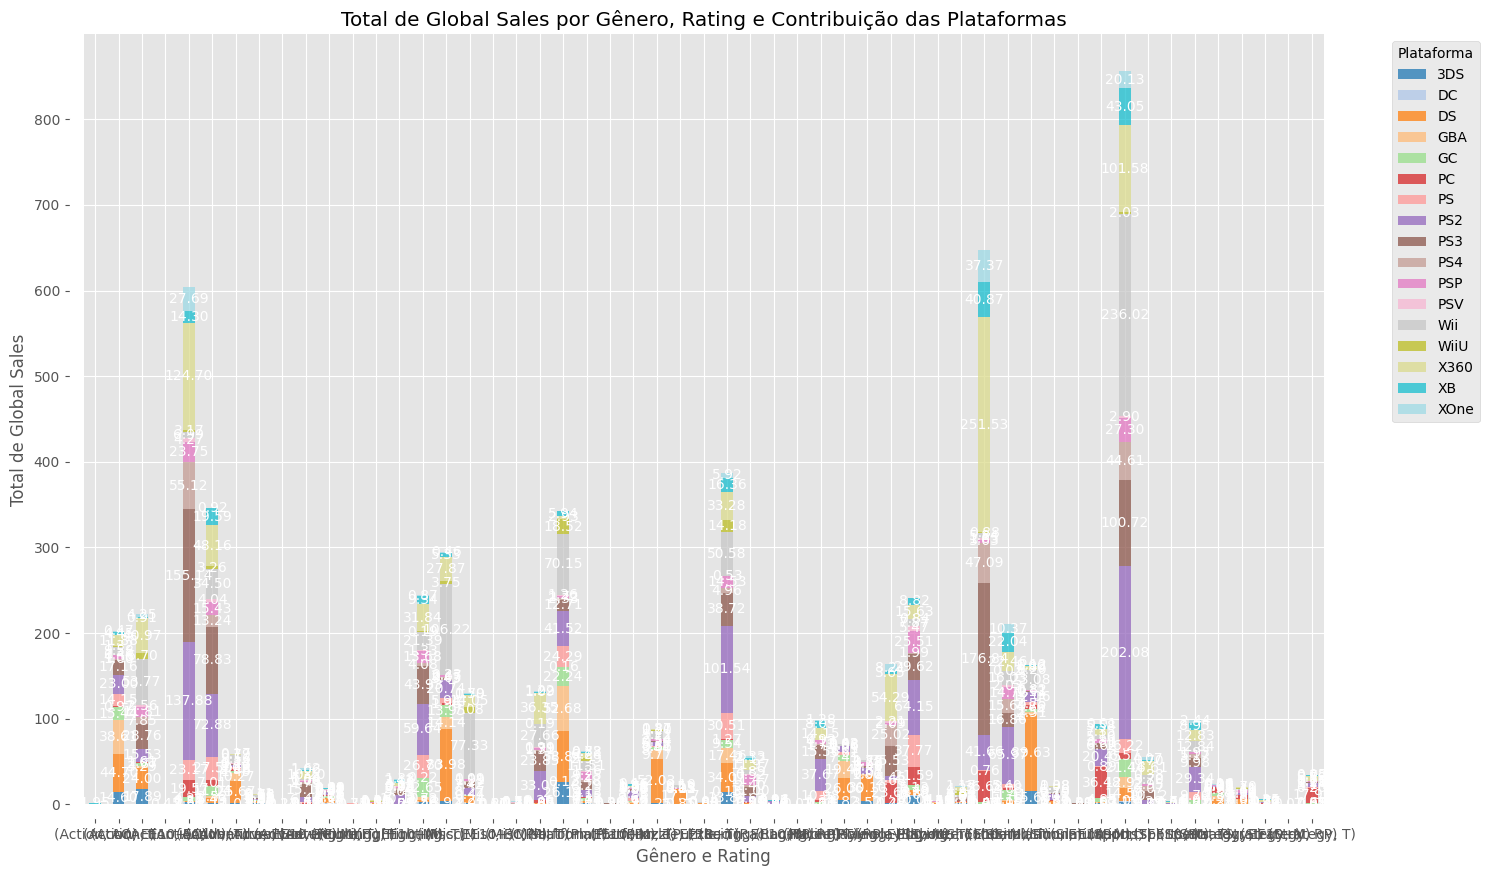

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para criar o gráfico de barras empilhadas
pivot_data = gData_grouped.pivot_table(index=['Genre', 'Rating'], columns='Platform', values='Global_Sales', fill_value=0)

# Criando o gráfico
plt.figure(figsize=(16, 10))

# Plotando as barras empilhadas
pivot_data.plot(kind='bar', stacked=True, colormap='tab20', alpha=0.75, ax=plt.gca())

# Adicionando anotações para mostrar o total de vendas por plataforma dentro de cada barra
for i, (index, row) in enumerate(pivot_data.iterrows()):
    total_sales = row.sum()
    bottom = 0
    for j, (platform, sales) in enumerate(row.items()):
        if sales > 0:
            plt.text(i, bottom + sales / 2, f'{sales:.2f}', ha='center', va='center', color='white')
            bottom += sales

# Ajustando o gráfico
plt.title('Total de Global Sales por Gênero, Rating e Contribuição das Plataformas')
plt.xlabel('Gênero e Rating')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(offset=10, trim=True)

# Exibindo o gráfico
plt.show()


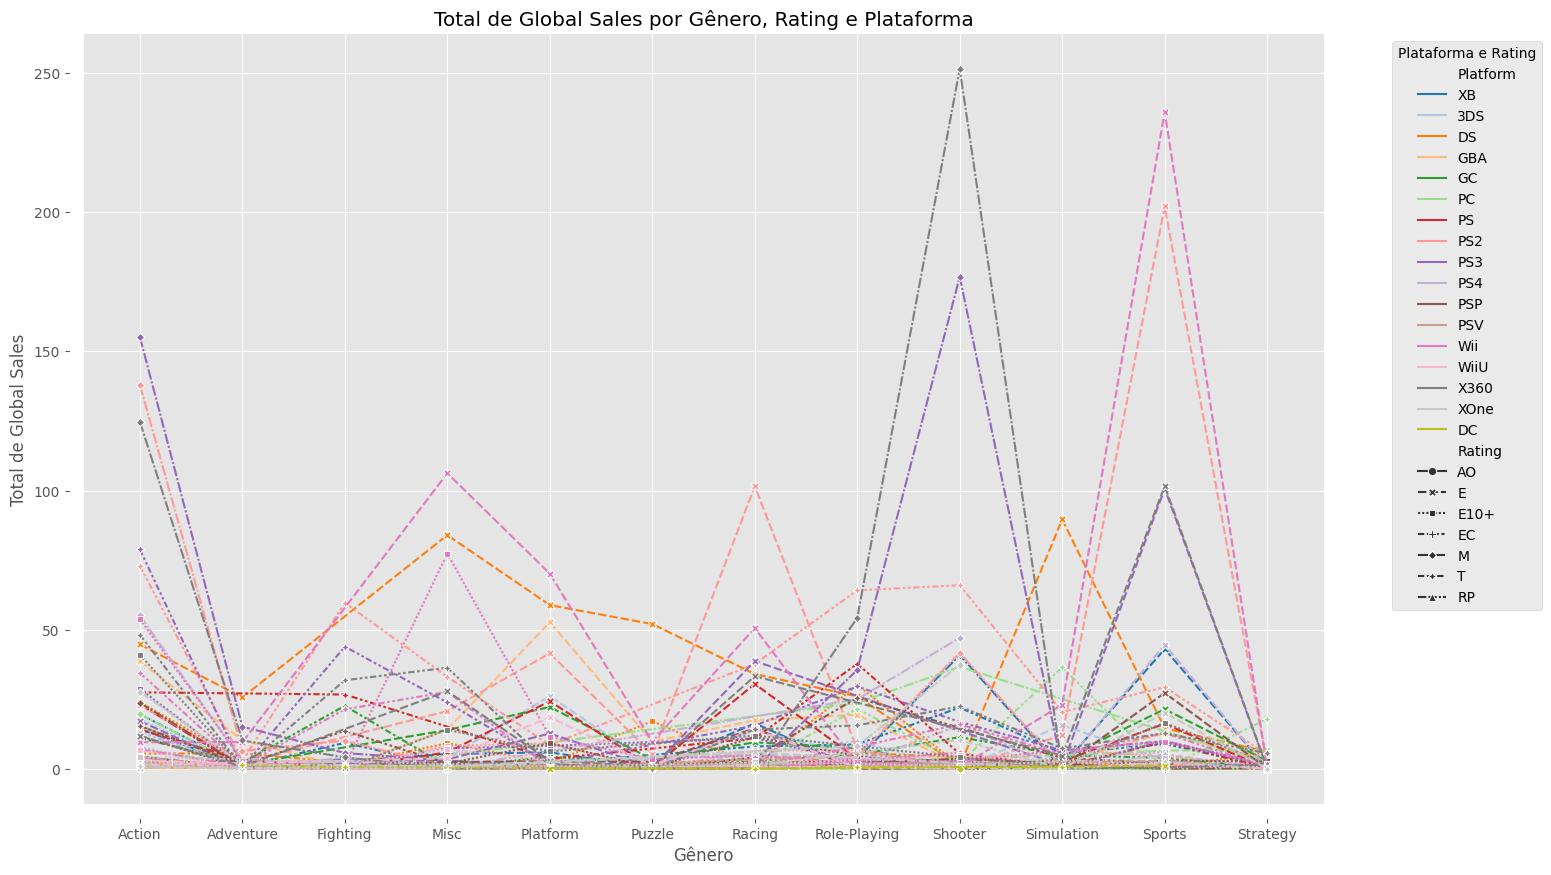

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Criando o gráfico
plt.figure(figsize=(16, 10))
sns.lineplot(data=gData_grouped, x='Genre', y='Global_Sales', hue='Platform', style='Rating', markers=True, palette='tab20')

# Ajustando o gráfico
plt.title('Total de Global Sales por Gênero, Rating e Plataforma')
plt.xlabel('Gênero')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma e Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(offset=10, trim=True)

# Exibindo o gráfico
plt.show()


<Figure size 1600x1000 with 0 Axes>

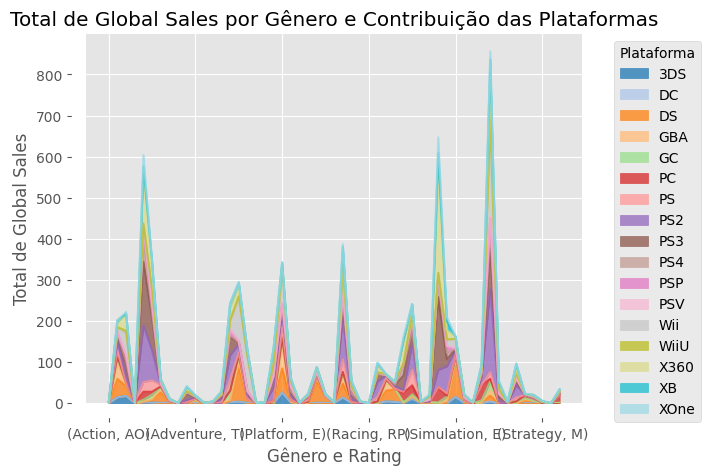

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Pivotando os dados para criar o gráfico de área empilhada
pivot_data = gData_grouped.pivot_table(index=['Genre', 'Rating'], columns='Platform', values='Global_Sales', fill_value=0)

# Criando o gráfico
plt.figure(figsize=(16, 10))
pivot_data.plot(kind='area', stacked=True, colormap='tab20', alpha=0.75)

# Ajustando o gráfico
plt.title('Total de Global Sales por Gênero e Contribuição das Plataformas')
plt.xlabel('Gênero e Rating')
plt.ylabel('Total de Global Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(offset=10, trim=True)

# Exibindo o gráfico
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Criando o gráfico sunburst
fig = px.sunburst(gData_grouped,
                  path=['Genre', 'Rating', 'Platform'],
                  values='Global_Sales',
                  title='Distribuição das vendas globais de jogos eletrônicos por gênero, rating e plataformas')

# Exibindo o gráfico
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Supondo que seu DataFrame seja 'df'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Agrupando os dados por Genre, Rating, e Platform, e calculando o total de Global_Sales
gData_grouped = gData_filtered.groupby(['Genre', 'Rating', 'Platform']).agg({'Global_Sales': 'sum'}).reset_index()

# Criando o gráfico treemap
fig = px.treemap(gData_grouped,
                 path=['Genre', 'Rating', 'Platform'],
                 values='Global_Sales',
                 title='Treemap das Vendas Globais de jogos eletrônicos por Gênero, Rating e Plataforma')

# Exibindo o gráfico
fig.show()


In [ ]:
import pandas as pd

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Filtrando para o gênero "Action", plataforma "PS4", e rating "E"
specific_data = gData_filtered[
    (gData_filtered['Genre'] == 'Sports') &
    (gData_filtered['Platform'] == 'PS2') &
    (gData_filtered['Rating'] == 'E')
]

# Exibindo os valores de Global_Sales
print(specific_data[['Global_Sales']])

total_global_sales = specific_data['Global_Sales'].sum()
print(f'Total de Global Sales {total_global_sales}')


       Global_Sales
183            5.23
213            4.91
238            4.53
241            4.49
250            4.39
...             ...
15073          0.02
15513          0.02
15776          0.02
16799          0.63
16840          0.62

[243 rows x 1 columns]
Total de Global Sales 202.07999999999996


In [ ]:
import pandas as pd

# Supondo que seu DataFrame seja 'gData_clean'
gData_clean = df.loc[:, ['Platform', 'Genre', 'Rating', 'Global_Sales']].dropna()

# Mapeando as classificações equivalentes
rating_map = {
    'K-A': 'E',  # Combina K-A com E
    'E': 'E',
    'E10+': 'E10+',
    'T': 'T',
    'M': 'M',
    'AO': 'AO',
    'EC': 'EC',
    'RP': 'RP'
}

# Aplicando a combinação no DataFrame
gData_clean['Rating'] = gData_clean['Rating'].map(rating_map)

# Filtrando para considerar apenas Global_Sales acima de 0
gData_filtered = gData_clean[gData_clean['Global_Sales'] > 0]

# Filtrando para o gênero "Action",
specific_data = gData_filtered[
    (gData_filtered['Genre'] == 'Action')
]

# Exibindo os valores de Global_Sales
print(specific_data[['Global_Sales']])

total_global_sales = specific_data['Global_Sales'].sum()
print(f'Total de Global Sales {total_global_sales}')


       Global_Sales
16            21.04
17            20.81
23            16.27
24            16.15
38            13.10
...             ...
16875          0.61
16883          0.61
16906          0.61
16908          0.61
16910          0.61

[2217 rows x 1 columns]
Total de Global Sales 1378.15
